DATA
* https://www.kaggle.com/mlg-ulb/creditcardfraud


*NOTES* - to be deleted or added in later
* https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/
* https://scikit-learn.org/stable/
* https://matplotlib.org/
* https://www.kaggle.com/mlg-ulb/creditcardfraud

* https://code.visualstudio.com/docs/python/jupyter-support

*AESTHETICS*
* https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/

*ALGORIRTHMS*
* https://scikit-learn.org/stable/modules/naive_bayes.html
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://scikit-learn.org/stable/modules/tree.html#classification

# Credit Card Fraud Detection

### Introduction




We will be exploring and modeling using classification models:
* Naive Bayes
* Decision Trees
* Logistic Regression

After we have fit the data to the models, we will evaluate the differences between each one and determine which one is the better fit or better at predicting credit card fraud.

##### Data

The data we will be analyzing is provided by the Machine Learning Group - ULB, the research unit of the Computer Science Department of the Université Libre de Bruxelles, Brussels, Belgium, on [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Correctly cited references will be at the end of this report.

The data contains credit card ransactions made over the course of two days in September 2012 by European cardholders.

## Data Exploration

#### Package/Library Import

Make sure to have these packages installed to be able to utilize them and run the following code blocks

* pandas - reading in data
* numpy - array manipulation
* matplotlib - visualization/plotting
* sklearn - modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix

#### Reading in the Data

Here, we read in our data using the pandas package.

In [2]:
data = pd.read_csv("creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


After outputting the sum of any null values in the principal components, we see that there are none, but to make sure we also print using the .any() function and the output is False.

In [3]:
print(data.isnull().sum())
print("Missing Values:", data.isnull().values.any())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing Values: False


Looking at the data, we can see there is an extreneous column, *Time*, that we do not need, so we can "drop" it to make it easier for our analysis.

In [4]:
data.drop('Time', axis = 1, inplace = True)
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [5]:
total_cases = len(data)
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])

print("Total cases: ", total_cases)
print("Fraud: ", fraud)
print("Non-fraud: ", non_fraud)

Total cases:  284807
Fraud:  492
Non-fraud:  284315


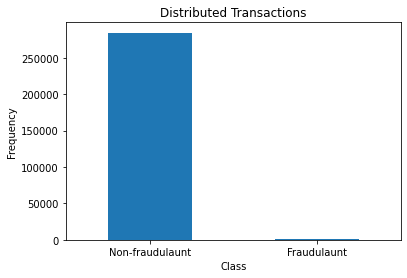

In [6]:
colors = ["#0101DF", "#DF0101"]
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Non-fraudulaunt', 'Fraudulaunt'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

From looking at the graph and the output before, it is clear that the data is unbalanced and there is a greater amount of normal, non-fraudalant transactions in comparison to fraudalant ones. This can cause problems for when we begin modeling.

## Splitting the Data

## Balancing the Data

Before we split the data for our cross validation, we will balance it. There are many ways to balance but the route that I chose is by undersampling the majority class, which in this case is, *non-fraudulaunt*. 



In [7]:
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

balanced_data = pd.concat([fraud_data, non_fraud_data])

# new_data = balanced_data.sample(frac=1, random_state=42)
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


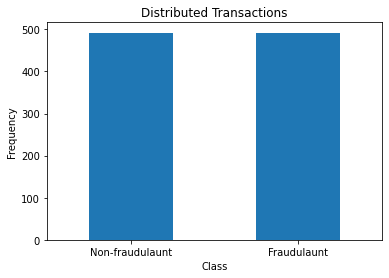

In [8]:
count_classes = pd.value_counts(balanced_data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Non-fraudulaunt', 'Fraudulaunt'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## Future Exploration